# Hauser & Schwarz - wizualizacja danych

W sekcji z wynikami eksperymentu I w artykule "How seemingly innocuous words can bias judgment: Semantic prosody and impression formation" znajduje się prosta wizualizacja średnich. Warto zwrócić uwage, że średnie są wystandaryzowane i punkt `0` nie ma zbyt dużego znaczenia. My dysponujemy już kodem służącym do wczytywania i analizy danych, więc użyjemy go ponownie w tym notatniku (zazwyczaj byśmy wczytali "obrobione" dane, ale tutaj zastosujemy niepotrzebą repetycję).

In [5]:
import pandas as pd
pd.set_option('max_columns', 50)
import re
import scipy.stats as stats
import pingouin as pg
import seaborn as sns
%matplotlib inline

In [13]:
data = pd.read_csv('../05_Wprowadzenie_do_pandas/semantic_prosody_utterly_totally_Daniel.csv')
totally = data.dropna(subset = ['tval']).dropna('columns')
utterly = data.dropna(subset = ['uval']).dropna('columns')
totally.columns = [col[2:] if re.search(string=col, pattern='^._') else col for col in totally.columns]
utterly.columns = [col[2:] if re.search(string=col, pattern='^._') else col for col in utterly.columns]
totally['adverb'] = 'totally'
utterly['adverb'] = 'utterly'
totally['val'] = totally['tval']
utterly['val'] = utterly['uval']
data = pd.concat([totally, utterly], sort=False)

data['competenceind'] = data[['competent', 'confident', 'intel', 'capable', 'efficient', 'skillful']].mean(1)
data['warmind'] = data[['warm', 'gn', 'sincere', 'friendly', 'wi', 'trustworthy']].mean(1)
data['Positive Change'] = stats.zscore(data['val'])
data['Competence'] = stats.zscore(data['competenceind'])
data['Warmth'] = stats.zscore(data['warmind'])
data_l = pd.melt(data, 
                 id_vars= ['adverb', 'V1'], 
                 value_vars = ['Warmth', 'Competence', 'Positive Change'],
                var_name = 'rating')

Nie będziemy się przejmować dokładną replikacją wykresu z artykułu - stworzymy coś podobnego, być może lepszego. Pierwszą wersję wykresu stworzymy za pomocą funkcji `barplot` z pakietu `seaborn`. Warto zwrócić uwagę na dwie opcje, które nie pojawiły się do tej pory:
+ `ci` - tutaj ustawiamy przedziały ufności (wąsy) na wykresie. Autorzy napisali, że wąsy oznaczają +- 1 błąd standardowy średniej, co przekłada się na 68% przedziały ufności.
+ `capsize` ustawia szerokość małych kreseczek nad i pod "wąsami"

Dodatkowo za pomocą polecenia `set` ustawiliśmy podpisy pod osiami.

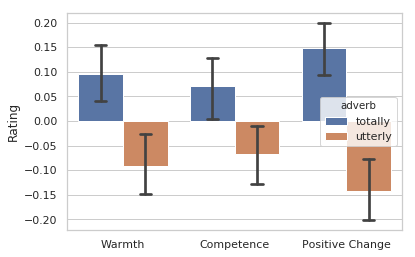

In [26]:
sns.set_style('whitegrid')
g = sns.barplot(y = 'value', 
            x = 'rating', 
            hue = 'adverb',
            ci = 68,
            data = data_l, 
               capsize = 0.1)
g.set(xlabel = '', ylabel = 'Rating');

Drugim typowym przedstawieniem takich wyników (które mniej kieruję uwagę na punkt 0, który nie ma zbyt dobrej interpretacji w naszym przypadku) jest wykres punktowy. Tworzymy go tak samo, tylko zastępujemy `barplot` poleceniem `pointplot`.

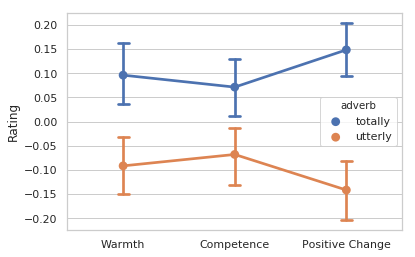

In [27]:
sns.set_style('whitegrid')
g = sns.pointplot(y = 'value', 
            x = 'rating', 
            hue = 'adverb',
            ci = 68,
            data = data_l, 
            capsize = 0.1)
g.set(xlabel = '', ylabel = 'Rating');